In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('\har_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
jump = pd.read_csv("D:\direct\har_data\Jumping.csv")    # Read csv file which stored in data folder
lyingback = pd.read_csv("D:\direct\har_data\lying_back.csv")          # Read csv file which stored in data folder
run = pd.read_csv("D:\direct\har_data\Running.csv")        # Read csv file which stored in data folder
sit = pd.read_csv("D:\direct\har_data\Sitting.csv")
stand = pd.read_csv("D:\direct\har_data\Standing.csv")
walk = pd.read_csv("D:\direct\har_data\Walking.csv")

In [4]:
print(jump.shape)
print(lyingback.shape)
print(run.shape)
print(sit.shape)
print(stand.shape)
print(walk.shape)

(750, 47)
(750, 47)
(750, 47)
(750, 47)
(750, 47)
(750, 47)


In [5]:
data_all = pd.DataFrame()
data_all = data_all.append([jump,lyingback,run,sit,stand,walk])

data_all.shape

(4500, 47)

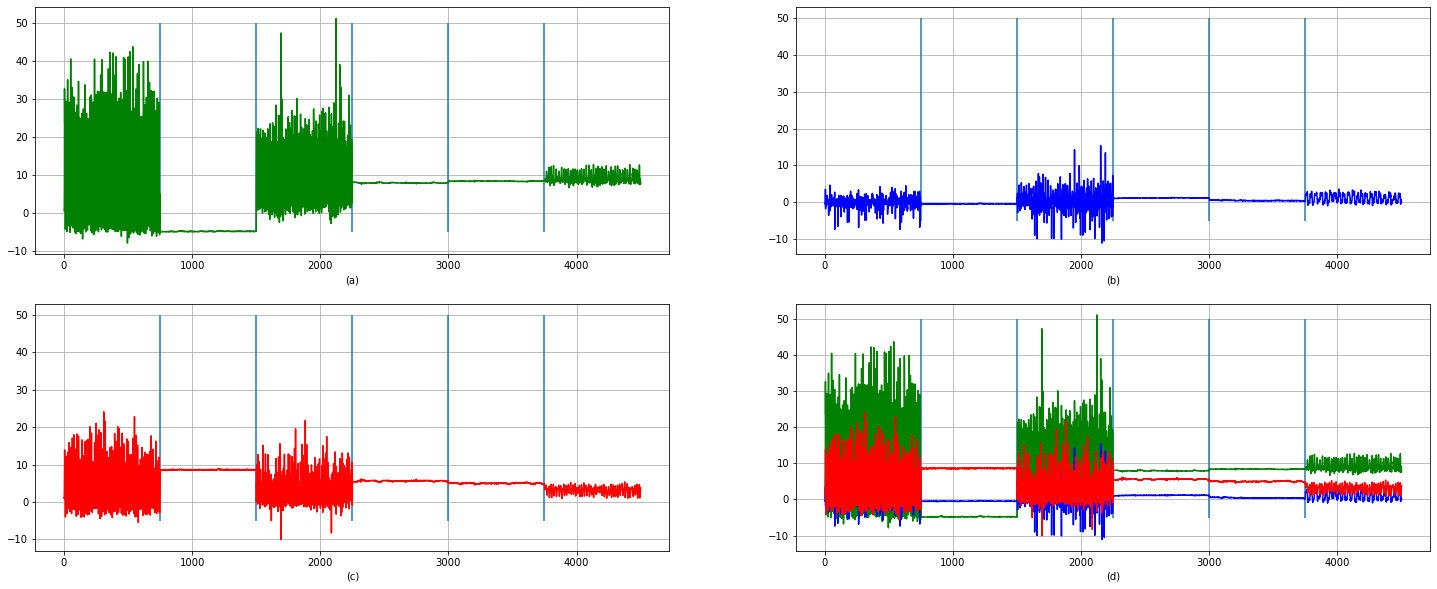

In [6]:
def action_divide():
    plt.vlines(x=750, ymin=-5, ymax=50)      # < 30584 Action = Stand
    plt.vlines(x=1500, ymin=-5, ymax=50)      # < 61142 Action = Walk
    plt.vlines(x=2250, ymin=-5, ymax=50)      # < 77598 Action = Run
    plt.vlines(x=3000, ymin=-5, ymax=50)     # < 108281 Action = Sit
    plt.vlines(x=3750, ymin=-5, ymax=50)     # < 113028 Action = Jump
                                                # > 113028 Action = Lie-down

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(data_all.id,data_all.T_ax,'g')     # Plot Accelerometer X-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(a)")
plt.grid()

plt.subplot(2,2,2)
plt.plot(data_all.id,data_all.T_ay,'b')     # Plot Accelerometer X-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(b)")
plt.grid()

plt.subplot(2,2,3)
plt.plot(data_all.id,data_all.T_az,'r')     # Plot Accelerometer Z-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(c)")
plt.grid()

plt.subplot(2,2,4)
plt.plot(data_all.id,data_all.T_ax,'g')
plt.plot(data_all.id,data_all.T_ay,'b')
plt.plot(data_all.id,data_all.T_az,'r')     # Plot Accelerometer All-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(d)")
plt.grid()

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
label = LabelEncoder()
data_all['label'] = label.fit_transform(data_all['action'])

x = data_all.drop(['label','id','action','T_mx','T_my','T_mz','RA_mx','RA_my','RA_mz','LA_mx','LA_my','LA_mz','RL_mx','RL_my','RL_mz','LL_mx','LL_my','LL_mz'], axis=1)
x = x.drop(['LA_ax','LA_ay','LA_az','LA_gx','LA_gy','LA_gz','LL_ax','LL_ay','LL_az','LL_gx','LL_gy','LL_gz'], axis=1)
y = data_all['label']

x.shape
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data = x, columns=['T_ax','T_ay','T_az','T_gx','T_gy','T_gz','RA_ax','RA_ay','RA_az','RA_gx','RA_gy','RA_gz','RL_ax','RL_ay','RL_az','RL_gx','RL_gy','RL_gz'])
scaled_x['label'] = y.values

scaled_x

,T_ax,T_ay,T_az,T_gx,T_gy,T_gz,RA_ax,RA_ay,RA_az,RA_gx,RA_gy,RA_gz,RL_ax,RL_ay,RL_az,RL_gx,RL_gy,RL_gz,label
0,-0.772495,-0.654842,-1.116490,0.348737,-0.289154,0.328319,-0.905444,-1.347947,-1.727403,-0.541188,0.870668,-0.181229,0.975432,-0.487296,0.854458,0.105892,-0.427082,0.091283,0
1,-0.644064,-0.622888,-1.194738,0.640466,0.291253,0.326782,-0.780252,-0.731128,-1.764044,1.372008,1.583385,-0.205322,0.347358,-0.062271,-0.500109,-1.141109,0.985965,0.163093,0
2,0.002693,-0.414688,0.513653,0.650605,-0.687034,0.837914,-0.842860,2.126609,-1.769049,2.225374,1.871223,1.181647,-4.144332,1.654809,-0.613405,-1.123639,0.571425,0.905816,0
3,3.415888,2.179256,2.536402,0.560595,-0.939849,-1.378674,0.519583,4.562300,-0.532761,1.852119,-0.398263,1.096976,-0.755905,-1.703946,2.009366,-1.337848,1.190612,1.916829,0
4,2.240179,-1.595897,2.716072,-0.399914,1.651008,1.098166,1.149295,4.516075,3.120338,1.494188,2.851613,-0.366803,-2.551061,-1.301001,-0.938539,3.916470,-0.502163,-0.711271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.346823,0.119510,-0.912823,0.656030,-0.104910,0.314855,1.216344,-0.535813,-0.998198,0.502118,1.579433,-1.713888,-0.244496,-0.284711,-0.923701,0.807559,0.118972,-0.979778,5
4496,0.315520,0.192167,-0.673612,0.330565,0.126396,-0.097116,0.943019,-0.557315,-0.938167,1.106827,1.339072,-1.787773,-0.234327,-0.208098,-0.218844,0.148437,0.327110,-1.055321,5
4497,0.190697,-0.150717,-0.546973,0.163124,0.094888,-0.123811,0.775632,-0.442548,-0.975906,0.900722,0.827197,-1.394865,-0.331526,-0.392413,0.229148,0.092551,0.158060,-0.975940,5
4498,0.139972,-0.348491,-0.534975,0.143273,-0.029531,0.088000,0.736066,-0.477164,-0.942865,0.067519,0.186937,-0.865398,-0.254651,-0.536776,-0.145001,-0.025428,0.132108,-0.931539,5


In [9]:
import scipy.stats as stats

frame_size = 100
hop_size = 25

def get_frames(df,frame_size, hop_size):
  N_FEATURES = 18

  frames = []
  labels = []

  for i in range(0,len(df) - frame_size,hop_size):
    T_ax = df['T_ax'].values[i: i + frame_size]
    T_ay = df['T_ay'].values[i: i + frame_size]
    T_az = df['T_az'].values[i: i + frame_size]
    T_gx = df['T_gx'].values[i: i + frame_size]
    T_gy = df['T_gy'].values[i: i + frame_size]
    T_gz = df['T_gz'].values[i: i + frame_size]
    RA_ax = df['RA_ax'].values[i: i + frame_size]
    RA_ay = df['RA_ay'].values[i: i + frame_size]
    RA_az = df['RA_az'].values[i: i + frame_size]
    RA_gx = df['RA_gx'].values[i: i + frame_size]
    RA_gy = df['RA_gy'].values[i: i + frame_size]
    RA_gz = df['RA_gz'].values[i: i + frame_size]
    RL_ax = df['RL_ax'].values[i: i + frame_size]
    RL_ay = df['RL_ay'].values[i: i + frame_size]
    RL_az = df['RL_az'].values[i: i + frame_size]
    RL_gx = df['RL_gx'].values[i: i + frame_size]
    RL_gy = df['RL_gy'].values[i: i + frame_size]
    RL_gz = df['RL_gz'].values[i: i + frame_size]

    label = stats.mode(df['label'][i: i + frame_size])[0][0]
    frames.append([T_ax,T_ay,T_az,T_gx,T_gy,T_gz,RA_ax,RA_ay,RA_az,RA_gx,RA_gy,RA_gz,RL_ax,RL_ay,RL_az,RL_gx,RL_gy,RL_gz])
    labels.append(label)

  frames = np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
  labels = np.asarray(labels)

  return frames, labels

In [10]:
x,y = get_frames(scaled_x,frame_size,hop_size)
x.shape,y.shape

((176, 100, 18), (176,))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify =y)
x_train.shape, x_test.shape

((140, 100, 18), (36, 100, 18))

In [12]:
x_train = x_train.reshape(140,100,18,1)
x_test = x_test.reshape(36,100,18,1)

x_train[0].shape, x_test[0].shape

((100, 18, 1), (100, 18, 1))

In [13]:
x_train.shape

(140, 100, 18, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [15]:
model = Sequential()
model.add(Input(shape=(100,18,1)))

model.add(Dropout(0.1))
# model.add(Conv2D(32,(2,2), activation = 'relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=1)

Train on 140 samples, validate on 36 samples
Epoch 1/20
140/140 [==============================] - 11s 80ms/sample - loss: 2.7098 - acc: 0.4857 - val_loss: 0.1636 - val_acc: 0.9444
Epoch 2/20
140/140 [==============================] - 1s 6ms/sample - loss: 0.7389 - acc: 0.8214 - val_loss: 0.2658 - val_acc: 0.9444
Epoch 3/20
140/140 [==============================] - 1s 5ms/sample - loss: 0.5235 - acc: 0.8714 - val_loss: 0.1113 - val_acc: 0.9444
Epoch 4/20
140/140 [==============================] - 1s 5ms/sample - loss: 0.2503 - acc: 0.9214 - val_loss: 0.0463 - val_acc: 0.9722
Epoch 5/20
140/140 [==============================] - 1s 5ms/sample - loss: 0.1524 - acc: 0.9357 - val_loss: 0.0750 - val_acc: 0.9722
Epoch 6/20
140/140 [==============================] - 1s 5ms/sample - loss: 0.1163 - acc: 0.9786 - val_loss: 0.1175 - val_acc: 0.9722
Epoch 7/20
140/140 [==============================] - 1s 5ms/sample - loss: 0.1049 - acc: 0.9786 - val_loss: 0.1424 - val_acc: 0.9722
Epoch 8/20
140/

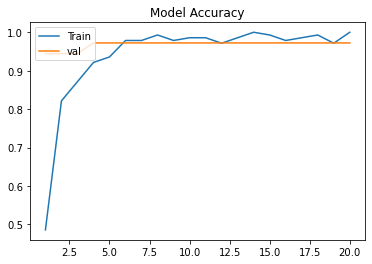

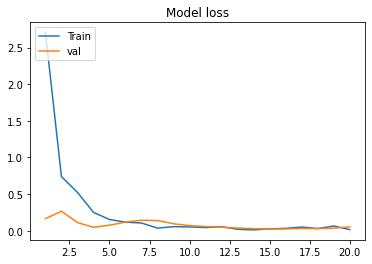

In [17]:
def plot_learning(history, epochs):
  epoch_range = range(1, epochs+1)

  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

plot_learning(history,20)

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

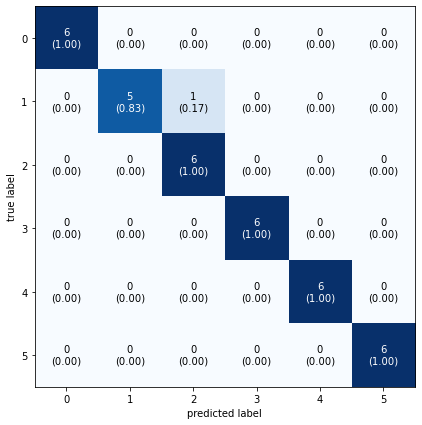

In [18]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [19]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 2ms/sample - loss: 0.0517 - acc: 0.9722


[0.05166753223683271, 0.9722222]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [21]:
print("Classification Report: \n", classification_report(y_test,y_pred))#classification report

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36

